In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_train (1).csv',header=None)
test_df = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_test (1).csv',header=None)

In [8]:
target_test=test_df[187]
#y_train=to_categorical(target_train)
#y_test=to_categorical(target_test)
y_train = train_df.loc[:,train_df.columns==187]
y_test = test_df.loc[:,test_df.columns==187]
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

In [12]:
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth= None)

#Train the model using the training sets y_pred=clf.predict(X_test)
history = clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [25]:


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
predictions = clf.predict(X_test)

y_pred  = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred,average='weighted')
recall_score=recall_score(y_test, y_pred,average='weighted')
f1_score=f1_score(y_test, y_pred,average='weighted')
print("Accuracy: %.3f%%" % (accuracy ))
print("precision: %.3f%%" % (precision ))
print("recall_score: %.3f%%" % (recall_score))
print("f1_score: %.3f%%" % (f1_score ))

Accuracy: 0.974%
precision: 0.974%
recall_score: 0.974%
f1_score: 0.972%


In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Normalized confusion matrix


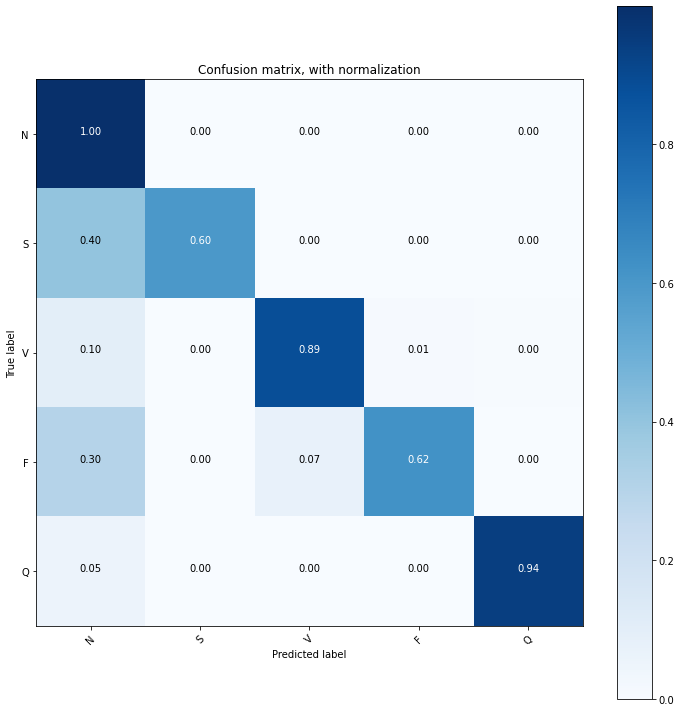

In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
disp = confusion_matrix(classifier, X_test, y_test,
display_labels=class_names, cmap=plt.cm.Blues, normalize='true')